In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<AxesSubplot:>

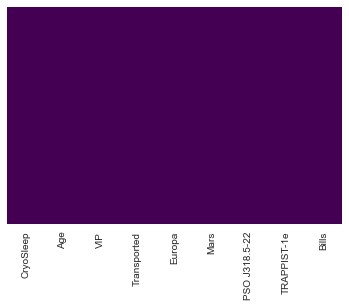

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
#sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
def fillMissing(data):
    data['Spa'] = data['Spa'].fillna(0)
    data['RoomService'] = data['RoomService'].fillna(0)
    data['VRDeck'] = data['VRDeck'].fillna(0)
    data['FoodCourt'] = data['FoodCourt'].fillna(0)
    data['ShoppingMall'] = data['ShoppingMall'].fillna(0)
    data['HomePlanet'] = data['HomePlanet'].fillna(data['HomePlanet'].mode()[0])
    data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
    data['CryoSleep'] = data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])
    data['Destination'] = data['Destination'].fillna(data['Destination'].mode()[0])
    data['VIP'] = data['VIP'].fillna(data['VIP'].mode()[0])
    data['Age'] = data['Age'].fillna(data['Age'].mean())
    data.drop(['Name'], axis=1, inplace=True)
    data.drop(['PassengerId'], axis=1, inplace=True)
    data.drop(['Cabin'], axis=1, inplace=True)

In [8]:
fillMissing(train)
fillMissing(test)

In [9]:
mylist = ['VIP','CryoSleep']
def OneHot(data):
    for l in mylist:
        catg = data[l].astype('category')
        c = catg.values
        data[l] = c.codes
OneHot(train)
OneHot(test)

In [10]:
catg = train['Transported'].astype('category')
c = catg.values
train['Transported'] = c.codes

In [11]:
home = pd.get_dummies(train['HomePlanet'], drop_first=True)
destination = pd.get_dummies(train['Destination'], drop_first=True)

train = pd.concat([train, home, destination], axis=1)
train.drop(['HomePlanet', 'Destination'], axis=1, inplace=True)

In [12]:
#train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1


In [13]:
home = pd.get_dummies(test['HomePlanet'], drop_first=True)
destination = pd.get_dummies(test['Destination'], drop_first=True)

test = pd.concat([test, home, destination], axis=1)
test.drop(['HomePlanet', 'Destination'], axis=1, inplace=True)

In [14]:
train['Bills'] = train['Spa'] + train['RoomService'] + train['VRDeck'] + train['FoodCourt'] + train['ShoppingMall']
test['Bills'] = test['Spa'] + test['RoomService'] + test['VRDeck'] + test['FoodCourt'] + test['ShoppingMall']

In [15]:
train.drop(['Spa', 'RoomService', 'VRDeck', 'FoodCourt', 'ShoppingMall'],
           axis=1,inplace=True)
test.drop(['Spa', 'RoomService', 'VRDeck', 'FoodCourt', 'ShoppingMall'],
          axis=1,inplace=True)

In [16]:
train.head()

,CryoSleep,Age,VIP,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,Bills
0,0,39.0,0,0,1,0,0,1,0.0
1,0,24.0,0,1,0,0,0,1,736.0
2,0,58.0,1,0,1,0,0,1,10383.0
3,0,33.0,0,0,1,0,0,1,5176.0
4,0,16.0,0,1,0,0,0,1,1091.0


In [93]:
X = train.drop(['Transported'],axis=1)
y = train['Transported']

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_(X)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y)

In [81]:
from sklearn.metrics import precision_score

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_val)

log_acc = accuracy_score(log_pred,y_val)
log_pre = precision_score(log_pred,y_val)
print('acc :',log_acc ,'precision :',log_pre)

acc : 0.7198712051517939 precision : 0.6444444444444445


In [91]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=8, max_features=2, n_estimators=50)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_val)

rfc_acc = accuracy_score(rfc_pred,y_val)
rfc_pre = precision_score(rfc_pred,y_val)
print(rfc_acc, rfc_pre)

0.7263109475620975 0.6248888888888889


In [96]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

log_reg = LogisticRegression(C=0.001)
svc_clf = SVC()
rfc_clf = RandomForestClassifier(max_depth=8, max_features=4, n_estimators=30)
#tree_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
            estimators=[('lr',log_reg), ('sv',svc_clf),
                        ('rf',rfc_clf)],
            voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (log_reg, svc_clf, rfc_clf,voting_clf):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_val)
    print(clf.__class__.__name__,':',accuracy_score(pred, y_val))

LogisticRegression : 0.7322907083716651
SVC : 0.7299908003679852
RandomForestClassifier : 0.7391904323827047
VotingClassifier : 0.7318307267709292


In [90]:
from sklearn.model_selection import GridSearchCV

log_param = {'C':[0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(log_reg, log_param, cv=5)
grid.fit(X_train, y_train)

grid.best_estimator_

LogisticRegression(C=0.001)

In [84]:
param_grid = {'n_estimators': [3, 10, 30,50,100,200], 
              'max_features': [2, 4, 6, 8],
              'max_depth':[2,4,8,16,None]}

rf_grid = GridSearchCV(rfc_clf, param_grid, cv=5)
rf_grid.fit(X_train, y_train)
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, max_features=4, n_estimators=30)

In [59]:
tree_param = {'max_depth':[2,3,4,5], 'max_features':[2,4,6]}

tree_grid = GridSearchCV(tree_clf, tree_param, cv=5)
tree_grid.fit(X_train, y_train)
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=4)

In [85]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
for name, score in zip(X_train.columns, rnd_clf.feature_importances_):
    print(name, score)

CryoSleep 0.1224815204045217
Age 0.26344533008305676
VIP 0.003058999155259992
Europa 0.032790470986055066
Mars 0.020621360440008542
PSO J318.5-22 0.005553415929177639
TRAPPIST-1e 0.009123342842040125
Bills 0.5429255601598802


<AxesSubplot:xlabel='Transported', ylabel='Age'>

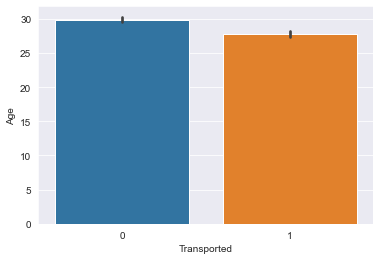

In [92]:
sns.barplot(x='Transported', y='Age',data=train)

In [100]:
t = pd.read_csv('test.csv')

In [97]:
rnf_clf  = RandomForestClassifier(max_depth=8, max_features=4, n_estimators=30)
rnf_clf.fit(X, y)
pred = rnf_clf.predict(test)

In [98]:
sample = pd.read_csv('sample_submission.csv')

In [99]:
sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [102]:
passengerId = t[['PassengerId']]

In [107]:
thisList = []
for val in pred:
    if val == 1:
        thisList.append(True)
    else:
        thisList.append(False)

In [111]:
transported = pd.DataFrame(thisList,columns=['Transported'])

In [113]:
submission = pd.concat([passengerId, transported],axis=1)

In [120]:
submission.to_csv('my_submission.csv',index=False)

In [121]:
sub = pd.read_csv('my_submission.csv')

In [122]:
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
